In [1]:
#pip install pandas_datareader

In [2]:
import os
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras.layers import Dense, LSTM

In [3]:
start_date = '2010.01.01'
end_date = '2020.01.31'
df_dates = pd.date_range(start_date, end_date) 

In [4]:
type(df_dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
df = pd.DataFrame(index=df_dates)

In [6]:
df_AAPL = web.DataReader('AAPL', data_source="yahoo", start=start_date, end=end_date)

In [7]:
df_AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.593423
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.604822
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.499765
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.487749
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.530882
...,...,...,...,...,...,...
2020-01-27,77.942497,76.220001,77.514999,77.237503,161940000.0,76.576187
2020-01-28,79.599998,78.047501,78.150002,79.422501,162234000.0,78.742477
2020-01-29,81.962502,80.345001,81.112503,81.084999,216229200.0,80.390747


In [8]:
#df = df.join(df_AAPL)

In [9]:
#collating close stats
def close():
    stocks = ['SPY', 'AAPL', 'GOOG', 'IBM', 'GLD']
    lst = [1, 2, 3, 4, 5]
    df_names = ['df_spy', 'df_aapl', 'df_goog', 'df_ibm', 'df_gld']

    for i, stock in enumerate(stocks):
        lst[i] = web.DataReader(stock, data_source="yahoo", start=start_date, end=end_date)
        df_names[i] = lst[i]
        #print(df_names)
    
    return df_names

In [10]:
df_spy,df_aapl,df_goog,df_ibm,df_gld=close()

In [11]:
df_spy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,91.087418
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,91.328552
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,91.392838
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,91.778671
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,92.084045
...,...,...,...,...,...,...
2020-01-27,325.119995,322.660004,323.029999,323.500000,84062500.0,317.569458
2020-01-28,327.850006,323.600006,325.059998,326.890015,63834000.0,320.897308
2020-01-29,328.630005,326.399994,328.380005,326.619995,53888900.0,320.632233


In [12]:
import matplotlib.pyplot as plt

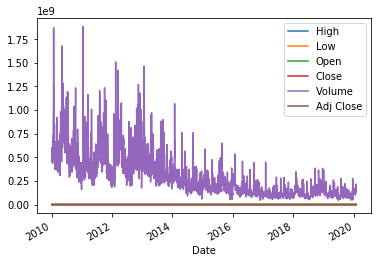

In [13]:
df_aapl.plot()
plt.show()

In [14]:
df_adj_aapl=df_aapl['Adj Close']

In [53]:
df_adj_aapl

Date
2010-01-04     6.593423
2010-01-05     6.604822
2010-01-06     6.499765
2010-01-07     6.487749
2010-01-08     6.530882
                ...    
2020-01-27    76.576187
2020-01-28    78.742477
2020-01-29    80.390747
2020-01-30    80.274246
2020-01-31    76.714989
Name: Adj Close, Length: 2537, dtype: float64

In [15]:
#scaler = MinMaxScaler()

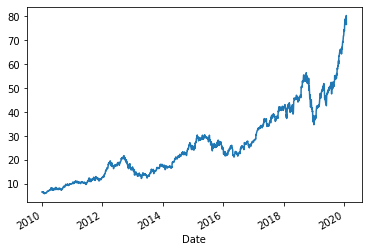

In [16]:
df_adj_aapl.plot()
plt.show()

In [17]:
df_adj_aapl_norm = df_adj_aapl/df_adj_aapl.max() ##normalize the data

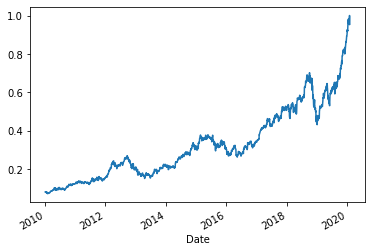

In [18]:
df_adj_aapl_norm.plot()
plt.show()

In [19]:
def dataset(df, step=1):
    
    df_adj = df.filter(['Adj Close'])
    data = df_adj.values
    
    scaler = MinMaxScaler() 
    
    data = scaler.fit_transform(data)
    train_len = int(len(data) * 0.6)
    val_len = int(len(data) * 0.2)
    test_len = int(len(data) * 0.2)
    train_val_len = train_len + val_len
    train_data = data[0:train_len, :]
    val_data = data[train_len:train_val_len, :]
    test_data = data[train_val_len:len(data), :]
    
    
    X_train = []
    y_train = []
    X_val = []
    y_val = []
    X_test = []
    y_test = []
    
    for i in range(step, len(train_data)):
        X_train.append(train_data[i-step:i, 0])
        y_train.append(train_data[i, 0])
        
    for i in range(step, len(val_data)):
        X_val.append(val_data[i-step:i, 0])
        y_val.append(val_data[i, 0])
        
    for i in range(step, len(test_data)):
        X_test.append(test_data[i-step:i, 0])
        y_test.append(test_data[i, 0])
        
        
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_val = np.array(X_val)
    y_val = np.array(y_val)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    
    
    return X_train, y_train, X_val, y_val, X_test, y_test
    
    
        

In [20]:
X_train, y_train, X_val, y_val, X_test, y_test = dataset(df_spy, 50)

In [49]:
(X_train.shape, y_train.shape)

((1472, 50), (1472,))

In [50]:
(X_val.shape, y_val.shape)

((457, 50), (457,))

In [51]:
(X_test.shape, y_test.shape)

((458, 50), (458,))

In [21]:
def make_csv(x, y, filename, data_dir):
    '''preparing the data extracted for storing in csv format'''
    
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
        
        
    df = pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1).dropna()
    df.to_csv(os.path.join(data_dir, filename), header=False, index=False)
    
    print('Path created '+str(data_dir)+'/'+str(filename))

In [22]:
data_dir = 'stock_data'

In [23]:
make_csv(X_train, y_train, filename='train_stock.csv', data_dir=data_dir) ###store training files

Path created stock_data/train_stock.csv


In [24]:
make_csv(X_val, y_val, filename='val_stock.csv', data_dir=data_dir) ###store validation files

Path created stock_data/val_stock.csv


In [25]:
X_test = pd.DataFrame(X_test)
X_test.to_csv(os.path.join(data_dir, 'test_stock.csv'), header=False, index=False)

uploading....

In [26]:
import sagemaker
import boto3
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer



In [27]:
prefix='Stock_prediction'

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sagemaker_session.default_bucket()

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
#load_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)
test_location = sagemaker_session.upload_data(os.path.join(data_dir, 'test_stock.csv'), key_prefix=prefix)
val_location = sagemaker_session.upload_data(os.path.join(data_dir, 'val_stock.csv'), key_prefix=prefix)
train_location = sagemaker_session.upload_data(os.path.join(data_dir, 'train_stock.csv'), key_prefix=prefix)

training...

In [28]:
container = get_image_uri(sagemaker_session.boto_region_name, 'xgboost','1.2-1')


xgb= sagemaker.estimator.Estimator(container,
                                   role,
                                   train_instance_count=1,
                                   train_instance_type='ml.m4.xlarge',
                                   output_path='s3://{}/{}'.format(bucket, prefix),
                                   sagemaker_session=sagemaker_session)

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [29]:
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        objective='reg:linear',
                        early_stopping_rounds=10,
                        num_round=200)

In [30]:
'''
from sagemaker.sklearn.estimator import SKLearn


estimator = SKLearn(entry_point='train.py',
                    source_dir='train',
                    role=role,
                    train_instance_count=1,
                    train_instance_type='ml.c4.xlarge',
                    sagemaker_session=sagemaker_session,
                    framework_version='0.23-1')
                    
                    
                    '''

"\nfrom sagemaker.sklearn.estimator import SKLearn\n\n\nestimator = SKLearn(entry_point='train.py',\n                    source_dir='train',\n                    role=role,\n                    train_instance_count=1,\n                    train_instance_type='ml.c4.xlarge',\n                    sagemaker_session=sagemaker_session,\n                    framework_version='0.23-1')\n                    \n                    \n                    "

In [31]:
#%%time


#estimator.fit({'train': load_data})

In [32]:
s3_input_train = sagemaker.TrainingInput(s3_data=train_location, content_type='csv')
s3_input_val = sagemaker.TrainingInput(s3_data=val_location, content_type='csv')

In [33]:
xgb.fit({'train': s3_input_train, 'validation': s3_input_val})

2021-01-31 05:42:24 Starting - Starting the training job...
2021-01-31 05:42:47 Starting - Launching requested ML instancesProfilerReport-1612071743: InProgress
......
2021-01-31 05:43:48 Starting - Preparing the instances for training......
2021-01-31 05:44:53 Downloading - Downloading input data
2021-01-31 05:44:53 Training - Downloading the training image......
2021-01-31 05:45:55 Uploading - Uploading generated training model
2021-01-31 05:45:55 Completed - Training job completed
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is '

In [34]:
xgb_transform = xgb.transformer(instance_count=1, instance_type='ml.m4.xlarge')

In [35]:
xgb_transform.transform(test_location, content_type='text/csv', split_type='Line')

.................................
[2021-01-31:05:51:26:INFO] No GPUs detected (normal if no gpus installed)
[2021-01-31:05:51:26:INFO] No GPUs detected (normal if no gpus installed)
[2021-01-31:05:51:26:INFO] nginx config: 
worker_processes auto;
daemon off;
[2021-01-31:05:51:26:INFO] No GPUs detected (normal if no gpus installed)
[2021-01-31:05:51:26:INFO] No GPUs detected (normal if no gpus installed)
[2021-01-31:05:51:26:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;

  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }

  server {
    listen 8080 deferred;
    client_max_body_size 0;

    keepalive_timeout 3;

    location ~ ^/(pi

In [36]:
xgb_transform.wait()

[2021-01-31:05:51:26:INFO] No GPUs detected (normal if no gpus installed)
[2021-01-31:05:51:26:INFO] No GPUs detected (normal if no gpus installed)
[2021-01-31:05:51:26:INFO] nginx config: 
worker_processes auto;
daemon off;
[2021-01-31:05:51:26:INFO] No GPUs detected (normal if no gpus installed)
[2021-01-31:05:51:26:INFO] No GPUs detected (normal if no gpus installed)
[2021-01-31:05:51:26:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

pid /tmp/nginx.pid;
error_log  /dev/stderr;

worker_rlimit_nofile 4096;

events {
  worker_connections 2048;
}

http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;

  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }

  server {
    listen 8080 deferred;
    client_max_body_size 0;

    keepalive_timeout 3;

    location ~ ^/(ping|invocations|execution-parameter

In [37]:
#serializer = StringSerializer(content_type="text/csv")

In [40]:
xgb_transform.output_path

's3://sagemaker-us-east-1-745263080552/sagemaker-xgboost-2021-01-31-05-46-11-747'

In [41]:
!aws s3 cp --recursive $xgb_transform.output_path $data_dir

download: s3://sagemaker-us-east-1-745263080552/sagemaker-xgboost-2021-01-31-05-46-11-747/test_stock.csv.out to stock_data/test_stock.csv.out


In [43]:
Y_pred = pd.read_csv(os.path.join(data_dir, 'test_stock.csv.out'), header=None)

Text(0.5, 1.0, 'Median Price vs Predicted Price')

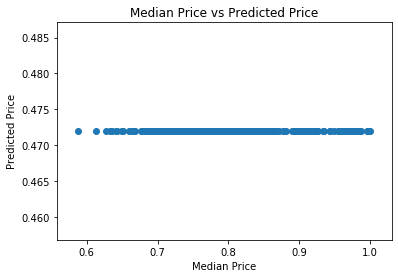

In [44]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Median Price")
plt.ylabel("Predicted Price")
plt.title("Median Price vs Predicted Price")

In [66]:
#from sklearn.metrics import accuracy_score
#print('Accuracy of model:: ', accuracy_score(y_test, Y_pred))

In [47]:
Y_pred

,0
0,0.471949
1,0.471949
2,0.471949
3,0.471949
4,0.471949
...,...
453,0.471949
454,0.471949
455,0.471949
456,0.471949


In [ ]:
#xgb_predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

Testing the model.....

In [ ]:
####xgb_predictor.content_type = 'text/csv'
#xgb_predictor.serializer = csv_serializer

In [ ]:
#y_pred = xgb_predictor.predict(X_test.values)
#y_pred = np.fromstring(y_pred, sep=',')

In [ ]:
#plt.scatter(y_test, y_pred)

In [ ]:
#xgb_predictor.delete_endpoint()

In [ ]:
#plt.plot(y_test)

In [ ]:
#plt.plot(y_pred)